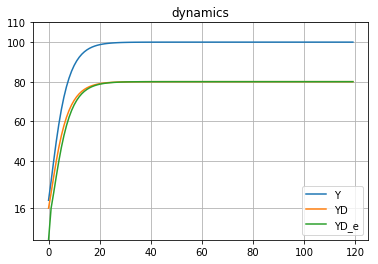

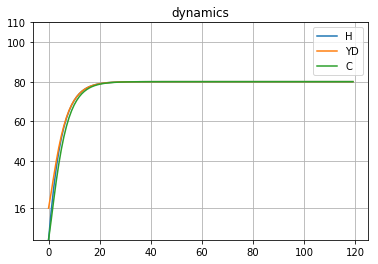

Enter the period to show the balance sheet and transaction matrix:2

Balance Sheet at period:  2
             1. Households    2. Production    3. Government    4. Sum
-----------  ---------------  ---------------  ---------------  --------
Money stock  14.08            0.00             -14.08           0.00

Transaction flow matrix at period:  2
                         1. Households    2. Production    3. Government    4. Sum
-----------------------  ---------------  ---------------  ---------------  --------
1.Consumption            -9.6             9.6                               0.0
2.Govt. expenditures                      20.0             -20.0            0.0
3.[output]                                [29.6]
4.Factor income(wages)   29.6             -29.6                             0.0
5.Taxes                  -5.92                             5.92             0.0
6.Change in stock money  -14.08                            14.08            0.0
sum                      0.0      

In [2]:
# -*- coding: utf-8 -*-
"""
Created on Fri Sep 30 11:02:45 2016
Last modified on Wed Jun  7 14:57:09 2017

@author: Patrick X. Li, 

@email: xihao.li@gmail.com

"""
#### Model SIMEX = SIM + Expectation ####

import numpy as np
import matplotlib.pyplot as plt
from tabulate import tabulate

"""
Method to round numbers in 2 digits
"""
def round_2(n1 ):
    if np.isscalar(n1):
        return np.round(  int( n1*1000 ) /1000, 2 );
    else:
        n2 = np.array(n1) * 1000;
        return np.round(  n2.astype(int) /1000, 2 );

end_periods = 120
theta = 0.2
alpha_1 = 0.6
alpha_2 = 0.4
W = 1

class Households:
    YD = np.zeros((1, end_periods));
    YD_e = np.zeros((1, end_periods));
    WB = np.zeros((1, end_periods)); 
    Ns = np.zeros((1, end_periods));
    C = np.zeros((1, end_periods));
    T = np.zeros((1, end_periods));

    H_h = np.zeros((1, end_periods));
    delta_H_h = np.zeros((1, end_periods));
    
class Production:
    Y = np.zeros((1, end_periods));
    WB = np.zeros((1, end_periods));
    Nd = np.zeros((1, end_periods));
    
class Government:
    G = np.zeros((1, end_periods));
    T = np.zeros((1, end_periods));
    H_s = np.zeros((1, end_periods));
    delta_H_s = np.zeros((1, end_periods));
    
#== initialize the value of YD[0], with G[0] = 20 to buy service from Production ==#
Government.G[0,0] = 20;
Production.Y[0,0] = Government.G[0,0] + Households.C[0,0] # Y[0] = 20 # Production produces the exact amount that is demanded by Government.G[0,0] and Households.C[0,0]
Production.WB[0,0] = Production.Y[0,0]; # Production pays 100% of its production to Households in the form of wage bill as the income of Households
Production.Nd[0,0] = Production.Y[0,0]/W; # Production hires Nd[0,0] amount of labor to produce, with the given unit wage W

Households.WB[0,0] = Production.WB[0,0];
Households.YD[0,0] = Households.WB[0,0] - theta * Households.WB[0,0];
Households.Ns[0,0] = Production.Nd[0,0];

for t in range(1,end_periods):
    Government.G[0,t] = Government.G[0,t-1]; # Government keeps the same level of government spending
    Households.YD_e[0,t] = Households.YD[0,t-1] # Household's expectational rule of YD at current period: by using YD at previous period
    # C[t] = alpha_1 * YD[t] + alpha_2 * H_h[t-1]
    Households.C[0,t] = alpha_1 * Households.YD_e[0,t] + alpha_2 * Households.H_h[0,t-1] 
    # where t = 1, the following rule regresses to: Y[t] = G[t] / (1 - alpha_1 * (1 - theta)) 
    
    Production.Y[0,t] = Government.G[0,t] + Households.C[0,t]; # Production produces what is demanded by Government.G[0,t] and Households.C[0,t] 
    Production.WB[0,t] = Production.Y[0,t];    
    Production.Nd[0,t] = Production.Y[0,t] / W;
    
    Households.WB[0,t] = Production.WB[0,t];
    Households.Ns[0,t] = Production.Nd[0,t];   
    
    Households.T[0,t] = theta * Households.WB[0,t];
    Government.T[0,t] = Households.T[0,t];
    Households.YD[0,t] = Households.WB[0,t] - Households.T[0,t];
        
    Government.delta_H_s[0,t] = Government.G[0,t] - Government.T[0,t];
    Households.delta_H_h[0,t] = Households.YD[0,t] - Households.C[0,t];
    Government.H_s[0,t] = Government.H_s[0,t-1] + Government.delta_H_s[0,t];
    Households.H_h[0,t] = Households.H_h[0,t-1] + Households.delta_H_h[0,t];

# simulation visualization
plt.figure(1)
plt.plot(Production.Y[0,:], label = 'Y')
plt.plot(Households.YD[0,:], label = 'YD')
plt.plot(Households.YD_e[0,:], label = 'YD_e')
plt.title('dynamics')
plt.legend(['Y', 'YD', 'YD_e'], loc=0) # legend automatically in the best location
plt.ylim(0, 110)
extraticks=[16, 40, 60, 80, 100, 110]
plt.grid()
plt.yticks(extraticks)
plt.show()

plt.figure(2)
plt.plot(Households.H_h[0,:], label = 'H')
plt.plot(Households.YD[0,:], label = 'YD')
plt.plot(Households.C[0,:], label = 'C')
plt.title('dynamics')
plt.legend(['H', 'YD', 'C'], loc=0) # legend automatically in the best location
plt.ylim(0, 110)
extraticks=[16, 40, 60, 80, 100, 110]
plt.yticks(extraticks)
plt.grid()
plt.show()

# visualization of the balance sheet and the transaction matrix
while True:
    table_periods = int(input('Enter the period to show the balance sheet and transaction matrix:'))
    if table_periods > end_periods + 1:
        table_periods = end_periods;

    
    headers = [" ", "1. Households", "2. Production", "3. Government", "4. Sum"]
    # balance sheet table
    bs_table = [["Money stock" ,Households.H_h[0,table_periods-1], 0.0, - Government.H_s[0,table_periods-1], sum( [Households.H_h[0,table_periods-1], 0.0, - Government.H_s[0,table_periods-1] ] )] ]
    print("\nBalance Sheet at period: ", table_periods)
    print(tabulate(bs_table, headers, floatfmt=".2f", numalign="left") )
    # transaction flow table
    
    sum_row_1 = sum([round_2(-Households.C[0,table_periods-1]), round_2(+Households.C[0,table_periods-1])]);
    sum_row_2 = sum([ round_2(+Government.G[0,table_periods-1]), round_2(-Government.G[0,table_periods-1]) ]);
    sum_row_4 = sum([ round_2( + W * Households.Ns[0,table_periods-1] ), round_2( -W * Production.Nd[0,table_periods-1] ) ]);
    sum_row_5 = sum([  round_2( -Households.T[0,table_periods-1] ), round_2( +Government.T[0,table_periods-1]) ]);
    sum_row_6 = sum([ round_2( -Households.delta_H_h[0,table_periods-1] ), round_2( +Government.delta_H_s[0,table_periods-1] ) ]);
    
    sum_column_1 = sum( round_2([-Households.C[0,table_periods-1], +W*Households.Ns[0,table_periods-1],  -Households.T[0,table_periods-1],-Households.delta_H_h[0,table_periods-1]  ]) );
    sum_column_2 = sum( round_2([+Households.C[0,table_periods-1], +Government.G[0,table_periods-1], -W*Production.Nd[0,table_periods-1]  ]) ); 
    sum_column_3 = sum( round_2([ -Government.G[0,table_periods-1],  +Government.T[0,table_periods-1], +Government.delta_H_s[0,table_periods-1]] ) );
    sum_all_columns = round_2( sum( [ sum_column_1, sum_column_2, sum_column_3 ] ) );
    
    tf_table = [["1.Consumption", round_2(-Households.C[0,table_periods-1]), round_2(+Households.C[0,table_periods-1]), " "  , sum_row_1 ],
    ["2.Govt. expenditures", " " , round_2(+Government.G[0,table_periods-1]), round_2(-Government.G[0,table_periods-1]), sum_row_2 ],
    ["3.[output]", " ", "[" + str( round_2( Production.Y[0,table_periods-1] ) ) +   "]", " ", " "  ],
    ["4.Factor income(wages)", round_2( + W * Households.Ns[0,table_periods-1] ), round_2( -W * Production.Nd[0,table_periods-1] ), " ", sum_row_4 ],
    ["5.Taxes", round_2( -Households.T[0,table_periods-1] ), " ", round_2( +Government.T[0,table_periods-1]), sum_row_5 ],
    ["6.Change in stock money", round_2( -Households.delta_H_h[0,table_periods-1] ), " ", round_2( +Government.delta_H_s[0,table_periods-1] ), sum_row_6 ],
    ["sum",sum_column_1 ,sum_column_2 , sum_column_3
    , sum_all_columns ] 
    ]
    print("\nTransaction flow matrix at period: ", table_periods)
    print(tabulate(tf_table, headers, floatfmt=".2f", numalign="left"))
    answer = input('Do you want to continue?:')
    if answer.lower().startswith("n"):
      print("ok, bye!")
      break
